In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv(r'D:\ML\final\PUBG Winner Prediction\train_V2.csv',header='infer')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [46]:
len(data) #有4446966筆資料

4446966

In [47]:
data.shape #4446966筆29個feature

(4446966, 29)

### Managing missing value

In [48]:
data.isnull().sum() #查看有多少缺值

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [49]:
data.dropna(inplace=True)

In [50]:
data.isnull().sum() #查看有多少缺值

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Feature Engineering

In [51]:
#Players Joined
#
data['playersJoined']=data.groupby('matchId')['matchId'].transform('count')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [52]:
# Create normalized features(把一些指數除以該場遊戲人數變成機率，較為客觀)
data['killsNorm'] = data['kills']*((100-data['playersJoined'])/100 + 1)
data['damageDealtNorm'] = data['damageDealt']*((100-data['playersJoined'])/100 + 1)
data['maxPlaceNorm'] = data['maxPlace']*((100-data['playersJoined'])/100 + 1)
data['matchDurationNorm'] = data['matchDuration']*((100-data['playersJoined'])/100 + 1)

# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
data[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


In [53]:
# Create headshot_rate feature(爆頭率)
data['headshot_rate'] = data['headshotKills'] / data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)

In [54]:
# Create feature totalDistance(總移動距離)
data['totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']

In [55]:
#作弊(沒有移動就殺人)
data['killsWithoutMoving'] = ((data['kills'] > 0) & (data['totalDistance'] == 0))
data[data['killsWithoutMoving'] == True].head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,headshot_rate,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0,0.8571,58,8.52,842.0600,21.30,842.06,0.000000,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0,0.6000,42,4.74,547.6280,17.38,2834.52,0.000000,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0,0.8947,21,35.80,3132.5000,35.80,1607.42,0.200000,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,1500,0.0000,73,1.27,200.4060,24.13,1014.73,0.000000,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0,0.3000,42,1.58,158.0000,17.38,2834.52,1.000000,0.0,True
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0,0.8000,44,9.36,789.5160,9.36,909.48,0.166667,0.0,True
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0,0.6000,48,18.24,1708.4800,9.12,836.00,0.333333,0.0,True
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0,0.8571,57,10.01,757.7570,21.45,856.57,0.285714,0.0,True
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,1500,0.2857,61,2.78,179.1710,11.12,1017.48,0.500000,0.0,True
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0,0.8571,53,1.47,125.7732,22.05,1051.05,0.000000,0.0,True


### outliers

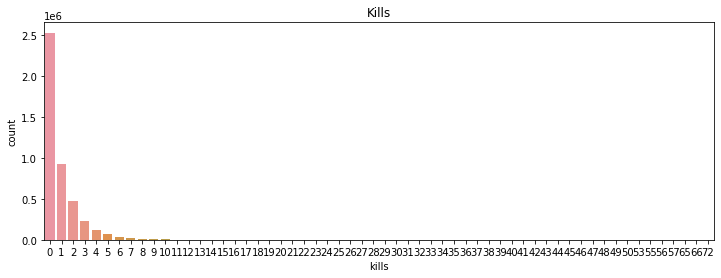

In [56]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=data, x=data['kills']).set_title('Kills')
plt.show()

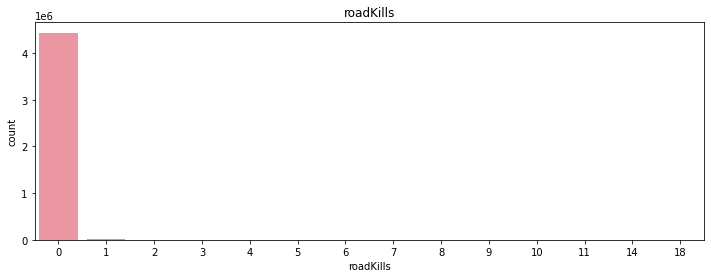

In [57]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=data, x=data['roadKills']).set_title('roadKills')
plt.show()

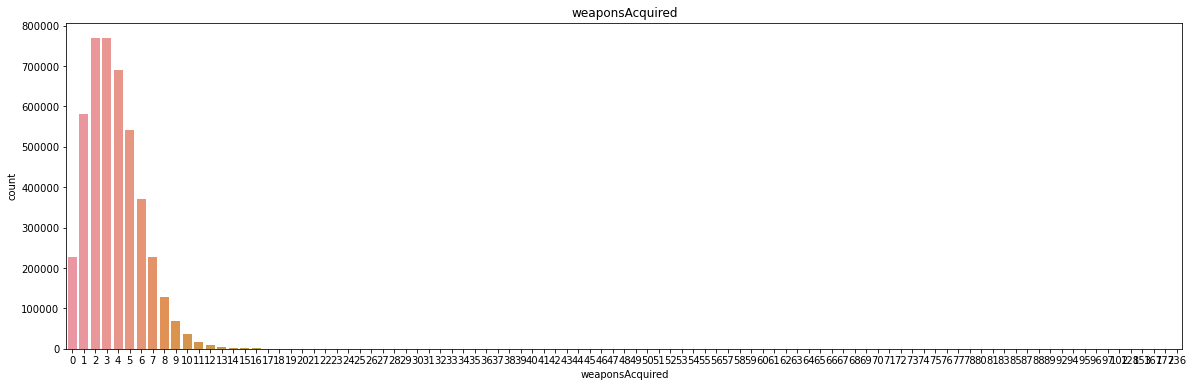

In [58]:
# Plot the distribution of kills
plt.figure(figsize=(20,6))
sns.countplot(data=data, x=data['weaponsAcquired']).set_title('weaponsAcquired')
plt.show()

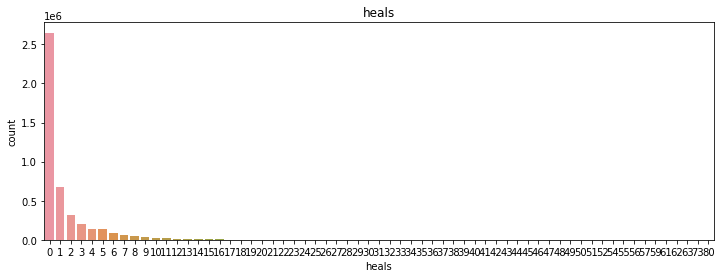

In [59]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=data, x=data['heals']).set_title('heals')
plt.show()

In [60]:
data.drop(data[data['killsWithoutMoving'] == True].index, inplace=True)

In [61]:
# Players who got more than 10 roadKills(路殺超過10個的)
data[data['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,headshot_rate,totalDistance,killsWithoutMoving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,1371,0.4286,92,15.12,1345.68,99.36,1572.48,0.000000,1282.302,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,1533,0.4713,88,12.32,1234.24,98.56,2179.52,0.000000,4934.600,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1568,1.0000,38,32.40,3359.88,61.56,3191.40,0.050000,5876.000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,1606,0.9398,84,20.88,2164.56,97.44,2233.00,0.277778,7853.000,False


In [62]:
data.drop(data[data['roadKills'] > 10].index, inplace=True)

In [63]:
# Players who got more than 30 kills(殺超過30人)
display(data[data['kills'] > 30].shape)
data[data['kills'] > 30].head(10)

(95, 37)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,headshot_rate,totalDistance,killsWithoutMoving
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,1500,0.8571,16,64.40,6854.00,14.72,3308.32,0.200000,48.82,False
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1500,1.0000,16,57.04,5680.08,14.72,3308.32,0.258065,780.70,False
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.7000,11,90.72,10355.31,20.79,3398.22,0.250000,23.71,False
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1500,1.0000,62,57.96,5565.54,11.04,1164.72,0.952381,718.30,False
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,1.0000,11,66.15,5993.19,17.01,3394.44,0.171429,71.51,False
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0,1.0000,11,122.85,12504.24,20.79,3398.22,0.200000,1036.00,False
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,...,0,1.0000,13,72.93,7169.58,24.31,3356.65,0.230769,124.20,False
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2907.0,0,27,2,1,...,0,1.0000,38,53.46,4709.34,8.10,1339.74,0.818182,382.40,False
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3055.0,0,9,0,1,...,1500,1.0000,20,59.40,5499.00,32.40,1605.60,0.272727,35.30,False
662650,dd424a8b74bd49,ac9dea6d62f2e6,8a728def0644be,9,0,3454.0,38,9,4,1,...,1500,0.2308,54,49.64,5042.84,20.44,1749.08,0.264706,111.10,False


In [64]:
data.drop(data[data['kills'] > 30].index, inplace=True)

In [65]:
#單場獲得武器超過70次
data[data['weaponsAcquired']>70].head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,headshot_rate,totalDistance,killsWithoutMoving
104825,4fe1c1b84d0e4c,62bc19a85c2ed8,17dea22cefe62a,3,0,2651.00,0,3,3,9,...,0,0.9286,28,41.28,4559.7200,25.80,3092.56,0.125000,4645.00,False
180523,aa4031a9ba3fbf,04f57c0cfb1306,5921b55b9e96b5,7,0,2869.00,0,2,5,5,...,0,0.7333,16,55.20,5278.9600,29.44,3310.16,0.066667,3107.00,False
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,1577,0.7111,91,0.00,73.1499,50.14,2072.09,0.000000,3187.00,False
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0,0.7500,98,0.00,178.8060,29.58,1399.44,0.000000,1687.00,False
1004726,a77a0e7230bdca,1a79c284fd3661,e024bf51bf1799,1,0,881.70,0,1,0,19,...,0,0.0000,19,12.67,1595.8770,34.39,3254.38,0.142857,1678.80,False
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0,0.8929,97,1.03,103.0000,29.87,1895.20,0.000000,5299.21,False
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0,0.5600,80,0.00,0.0000,31.20,1596.00,0.000000,653.10,False
1592744,634a224c53444e,75fa7591d1538c,f900de1ec39fa5,9,0,1726.00,0,3,0,9,...,0,0.2000,11,43.47,3262.1400,20.79,3398.22,0.130435,2888.80,False
1834515,e927e9020f7e0d,60d6b714a7308f,8e265af296007b,1,1,26.46,0,0,1,51,...,0,0.9200,95,0.00,27.7830,27.30,1502.55,0.000000,2835.00,False
2373240,a8c150d5d3d3e2,6e1c8c5f91e060,f900de1ec39fa5,12,0,1746.00,0,1,1,11,...,0,0.0000,11,30.24,3299.9400,20.79,3398.22,0.062500,275.90,False


In [66]:
data.drop(data[data['weaponsAcquired']>70].index,inplace=True)

In [67]:
#單場治療超過35次
data[data['heals']>35].head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,headshot_rate,totalDistance,killsWithoutMoving
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.00,0,0,47,43,...,0,0.9368,96,0.00,0.0000,99.84,1868.88,0.0,6854.000,False
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.00,0,1,43,21,...,0,0.9615,93,1.07,194.7400,28.89,1639.24,1.0,3083.400,False
67676,9141a9dd94680e,10e9baaea7ee52,1746a49f176549,0,3,97.01,0,0,37,45,...,0,0.8977,89,0.00,107.6811,98.79,2050.17,0.0,5325.200,False
100152,6c814c89c4e063,43f1edf6402ad5,7be6241e8a3be8,0,6,0.00,0,0,37,43,...,1591,0.8673,99,0.00,0.0000,99.99,1434.20,0.0,3019.480,False
112499,3a730c969a78ee,96774752376c8f,0998fc79a99bae,0,1,110.00,0,1,38,29,...,0,0.7292,98,1.02,112.2000,49.98,1912.50,1.0,5363.000,False
118485,7208bfaf76dc8c,ef6b00a51956cc,333dccf339d84c,4,8,699.00,6,1,38,13,...,0,0.6897,95,2.10,733.9500,31.50,1953.00,0.5,4397.000,False
119220,65e9a3a6b68a9e,683c95307ab8fa,d60df702011220,0,4,331.20,3,0,37,7,...,1496,0.6667,91,3.27,361.0080,30.52,2075.36,0.0,3557.000,False
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.00,0,0,52,49,...,1543,0.8333,97,0.00,0.0000,99.91,1415.22,0.0,1343.443,False
161037,a25e3f60da3e6f,996c0780017979,ed42336910b501,0,9,0.00,0,0,37,42,...,0,0.8511,95,0.00,0.0000,50.40,1439.55,0.0,1017.000,False
168684,eabf8c533b1aac,6a3e40f1134317,411dae6e9740ec,0,4,0.00,0,0,37,47,...,0,0.8462,97,0.00,0.0000,27.81,1806.62,0.0,7325.000,False


In [68]:
data.drop(data[data['heals']>35].index,inplace=True)
data.shape

(4445028, 37)

### Drop ID 性質的 feature

In [69]:
data = data.drop(['Id','groupId','matchId'],axis=1)

In [70]:
data.dtypes #查看資料型態

assists                 int64
boosts                  int64
damageDealt           float64
DBNOs                   int64
headshotKills           int64
heals                   int64
killPlace               int64
killPoints              int64
kills                   int64
killStreaks             int64
longestKill           float64
matchDuration           int64
matchType              object
maxPlace                int64
numGroups               int64
rankPoints              int64
revives                 int64
rideDistance          float64
roadKills               int64
swimDistance          float64
teamKills               int64
vehicleDestroys         int64
walkDistance          float64
weaponsAcquired         int64
winPoints               int64
winPlacePerc          float64
playersJoined           int64
killsNorm             float64
damageDealtNorm       float64
maxPlaceNorm          float64
matchDurationNorm     float64
headshot_rate         float64
totalDistance         float64
killsWitho

In [71]:
data.shape

(4445028, 34)

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['matchType']=le.fit_transform(data['matchType'])

In [73]:
data.dtypes #確認剩餘欄位型態

assists                 int64
boosts                  int64
damageDealt           float64
DBNOs                   int64
headshotKills           int64
heals                   int64
killPlace               int64
killPoints              int64
kills                   int64
killStreaks             int64
longestKill           float64
matchDuration           int64
matchType               int32
maxPlace                int64
numGroups               int64
rankPoints              int64
revives                 int64
rideDistance          float64
roadKills               int64
swimDistance          float64
teamKills               int64
vehicleDestroys         int64
walkDistance          float64
weaponsAcquired         int64
winPoints               int64
winPlacePerc          float64
playersJoined           int64
killsNorm             float64
damageDealtNorm       float64
maxPlaceNorm          float64
matchDurationNorm     float64
headshot_rate         float64
totalDistance         float64
killsWitho

### column-wise 的 variance

In [74]:
from sklearn.preprocessing import Normalizer

no = Normalizer()  #預設是 l2 norm
scaled_data = no.fit_transform(data)
scaled_data[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.20939494e-02,  4.56976520e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.80911632e-01,
        5.52348735e-03,  1.03105097e-02,  9.57404473e-03, -3.68232490e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.01433135e-02,  3.68232490e-04,
        5.39828830e-01,  1.63642518e-04,  3.53503190e-02,  0.00000000e+00,
        0.00000000e+00,  1.07229301e-02,  5.00148097e-01,  0.00000000e+00,
        9.01433135e-02,  0.00000000e+00])

In [75]:
scaled_data.var(axis=0)

array([1.82415633e-08, 1.08399549e-07, 1.39689146e-03, 7.38045447e-08,
       1.88722315e-08, 2.86188352e-07, 1.16632691e-04, 3.30037512e-02,
       1.18412262e-07, 3.60062162e-08, 9.64389334e-05, 1.66200225e-02,
       3.48603443e-06, 7.09676891e-05, 6.77362768e-05, 5.69762283e-02,
       1.29487225e-08, 2.67699114e-02, 1.52194882e-10, 3.56202438e-05,
       2.02620161e-09, 2.65856393e-10, 4.03261735e-02, 3.37006640e-07,
       4.67530443e-02, 4.66537331e-09, 7.89787502e-05, 1.44678442e-07,
       1.69497434e-03, 7.70133728e-05, 1.87321943e-02, 5.39911482e-09,
       7.13150740e-02, 0.00000000e+00])

### 假設我們將 variance threshold 定義為至少大於 1e-08，則 feature 減少為 29個(34-->28)

In [76]:
from sklearn.feature_selection import VarianceThreshold
# vt = VarianceThreshold(threshold=5e-08)
vt = VarianceThreshold(threshold=1e-08)
X_t = vt.fit_transform(scaled_data)
X_t.var(axis=0)

array([1.82415633e-08, 1.08399549e-07, 1.39689146e-03, 7.38045447e-08,
       1.88722315e-08, 2.86188352e-07, 1.16632691e-04, 3.30037512e-02,
       1.18412262e-07, 3.60062162e-08, 9.64389334e-05, 1.66200225e-02,
       3.48603443e-06, 7.09676891e-05, 6.77362768e-05, 5.69762283e-02,
       1.29487225e-08, 2.67699114e-02, 3.56202438e-05, 4.03261735e-02,
       3.37006640e-07, 4.67530443e-02, 7.89787502e-05, 1.44678442e-07,
       1.69497434e-03, 7.70133728e-05, 1.87321943e-02, 7.13150740e-02])

In [77]:
final_data=data.copy()
delete=[]

for i in range(34):
    if scaled_data.var(axis=0)[i] not in X_t.var(axis=0) and data.columns[i]!='winPlacePerc':
        delete.append(data.columns[i])

final_data = data.drop(delete,axis=1)
final_data.head() #最終data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,totalDistance
0,0,0,0.00,0,0,0,60,1241,0,0,...,244.80,1,1466,0.4444,96,0.00,0.0000,29.12,1358.24,244.8000
1,0,0,91.47,0,0,0,57,0,0,0,...,1434.00,5,0,0.6400,91,0.00,99.7023,28.34,1936.93,1445.0445
2,1,0,68.00,0,0,0,47,0,0,0,...,161.80,2,0,0.7755,98,0.00,69.3600,51.00,1344.36,161.8000
3,0,0,32.90,0,0,0,75,0,0,0,...,202.70,3,0,0.1667,91,0.00,35.8610,33.79,1565.24,202.7000
4,0,0,100.00,0,0,0,45,0,1,1,...,49.75,2,0,0.1875,97,1.03,103.0000,99.91,1466.72,49.7500


In [78]:
final_data.shape

(4445028, 29)

## 訓練開始

In [79]:
y=data['winPlacePerc']
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4445028, dtype: float64

In [80]:
X=final_data
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,totalDistance
0,0,0,0.00,0,0,0,60,1241,0,0,...,244.80,1,1466,0.4444,96,0.00,0.0000,29.12,1358.24,244.8000
1,0,0,91.47,0,0,0,57,0,0,0,...,1434.00,5,0,0.6400,91,0.00,99.7023,28.34,1936.93,1445.0445
2,1,0,68.00,0,0,0,47,0,0,0,...,161.80,2,0,0.7755,98,0.00,69.3600,51.00,1344.36,161.8000
3,0,0,32.90,0,0,0,75,0,0,0,...,202.70,3,0,0.1667,91,0.00,35.8610,33.79,1565.24,202.7000
4,0,0,100.00,0,0,0,45,0,1,1,...,49.75,2,0,0.1875,97,1.03,103.0000,99.91,1466.72,49.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,1019.00,3,1507,0.1786,94,0.00,0.0000,30.74,1985.38,2311.0000
4446962,0,1,44.15,0,0,0,69,0,0,0,...,81.70,6,0,0.2935,93,0.00,47.2405,99.51,1535.45,81.7000
4446963,0,0,59.06,0,0,0,66,0,0,0,...,788.70,4,0,0.4815,98,0.00,60.2412,28.56,1347.42,790.8840
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2748.00,8,0,0.8000,94,2.12,191.2240,27.56,1455.38,2748.0000


#### !!不適合Decisiom Tree、Logistic regression、Gaussian NB、SVM，因為他們適合0/1的資料

In [81]:
from sklearn.model_selection import cross_val_score

#### LinearRegression

In [82]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(X, y)
np.mean(cross_val_score(lr, X, y, cv=8))

0.9739573863772006

In [122]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(X, y)
scoring = 'neg_mean_absolute_error'
nmae = cross_val_score(lr, X, y, cv=8,scoring=scoring)
mae = float(nmae.mean()*(-1))
print("LinearRegression mae mean",'{:.10f}'.format(mae))

LinearRegression mae mean 0.0277332106


#### DecisionTreeRegressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X, y)
np.mean(cross_val_score(DTR, X, y, cv=8))

0.9999999998878328

In [123]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X, y)
scoring = 'neg_mean_absolute_error'
nmae = cross_val_score(lr, X, y, cv=8,scoring=scoring)
mae = float(nmae.mean()*(-1))
print("DecisionTreeRegressor mae mean",'{:.10f}'.format(mae))

DecisionTreeRegressor mae mean 0.0277332106


In [84]:
# from sklearn.tree import DecisionTreeRegressor
# DTR = DecisionTreeRegressor()
# DTR.fit(X, y)
# np.mean(cross_val_score(DTR, X, y, cv=20))

#### Support Vector Regression, SVR

In [85]:
# from sklearn.svm import SVR

# SVR = SVR(C=1, kernel='linear')
# SVR.fit(X, y)
# np.mean(cross_val_score(SVR, X, y, cv=8))

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [87]:
# from sklearn.svm import SVR

# SVR = SVR().fit(X_train, y_train)
# SVR.fit(X, y)
# print('SVR score:',svc.score(X_test, y_test))

#### tensorflow

In [93]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [94]:
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10, verbose=0):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule, verbose)

In [95]:
lr_sched = step_decay_schedule(initial_lr=0.1, decay_factor=0.9, step_size=1, verbose=1)
early_stopping = EarlyStopping(monitor='val_mae', mode = 'min', patience=30, verbose=1)

##### 模型建立

In [96]:
model1 = Sequential()
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae'])

In [97]:
history = model1.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=80,
                 batch_size=32768,
                 callbacks=[lr_sched,early_stopping], 
                 verbose=1)

Epoch 1/80

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
109/109 [==============================] - 28s 255ms/step - loss: 18038.1932 - mae: 0.3974 - val_loss: 0.5939 - val_mae: 0.1768
Epoch 2/80

Epoch 00002: LearningRateScheduler reducing learning rate to 0.09000000000000001.
109/109 [==============================] - 27s 246ms/step - loss: 0.5868 - mae: 0.1700 - val_loss: 0.5693 - val_mae: 0.1523
Epoch 3/80

Epoch 00003: LearningRateScheduler reducing learning rate to 0.08100000000000002.
109/109 [==============================] - 27s 246ms/step - loss: 0.5663 - mae: 0.1498 - val_loss: 0.5608 - val_mae: 0.1437
Epoch 4/80

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0729.
109/109 [==============================] - 27s 246ms/step - loss: 0.5590 - mae: 0.1426 - val_loss: 0.5569 - val_mae: 0.1394
Epoch 5/80

Epoch 00005: LearningRateScheduler reducing learning rate to 0.06561.
109/109 [==============================] - 27s 246ms/step - loss: 0.555

109/109 [==============================] - 28s 260ms/step - loss: 0.5312 - mae: 0.1106 - val_loss: 0.5321 - val_mae: 0.1106
Epoch 39/80

Epoch 00039: LearningRateScheduler reducing learning rate to 0.001824800363140075.
109/109 [==============================] - 28s 260ms/step - loss: 0.5310 - mae: 0.1104 - val_loss: 0.5320 - val_mae: 0.1107
Epoch 40/80

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0016423203268260676.
109/109 [==============================] - 28s 258ms/step - loss: 0.5311 - mae: 0.1105 - val_loss: 0.5319 - val_mae: 0.1105
Epoch 41/80

Epoch 00041: LearningRateScheduler reducing learning rate to 0.001478088294143461.
109/109 [==============================] - 28s 261ms/step - loss: 0.5306 - mae: 0.1101 - val_loss: 0.5318 - val_mae: 0.1103
Epoch 42/80

Epoch 00042: LearningRateScheduler reducing learning rate to 0.0013302794647291147.
109/109 [==============================] - 28s 260ms/step - loss: 0.5311 - mae: 0.1101 - val_loss: 0.5318 - val_mae: 0

109/109 [==============================] - 28s 259ms/step - loss: 0.5300 - mae: 0.1088 - val_loss: 0.5308 - val_mae: 0.1089
Epoch 76/80

Epoch 00076: LearningRateScheduler reducing learning rate to 3.6998848503512766e-05.
109/109 [==============================] - 28s 260ms/step - loss: 0.5297 - mae: 0.1088 - val_loss: 0.5308 - val_mae: 0.1089
Epoch 77/80

Epoch 00077: LearningRateScheduler reducing learning rate to 3.329896365316149e-05.
109/109 [==============================] - 28s 260ms/step - loss: 0.5299 - mae: 0.1087 - val_loss: 0.5308 - val_mae: 0.1089
Epoch 78/80

Epoch 00078: LearningRateScheduler reducing learning rate to 2.996906728784534e-05.
109/109 [==============================] - 28s 260ms/step - loss: 0.5299 - mae: 0.1088 - val_loss: 0.5308 - val_mae: 0.1089
Epoch 79/80

Epoch 00079: LearningRateScheduler reducing learning rate to 2.697216055906081e-05.
109/109 [==============================] - 29s 262ms/step - loss: 0.5297 - mae: 0.1087 - val_loss: 0.5308 - val_mae

In [98]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               15360     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 179,713
Trainable params: 179,713
Non-trainable params: 0
_________________________________________________________________


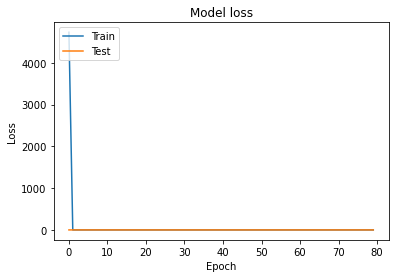

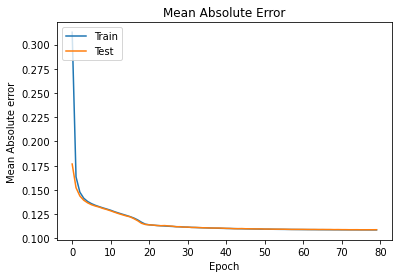

In [99]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mae values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('Mean Absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 加上Drop out

In [118]:
model21 = Sequential()
model21.add(Dense(512, activation='relu'))
model21.add(Dropout(0.1))
model21.add(Dense(256, activation='relu'))
model21.add(Dropout(0.1))
model21.add(Dense(128, activation='relu'))
model21.add(Dropout(0.1))
model21.add(Dense(1, activation='sigmoid'))
model21.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae'])

In [119]:
history = model21.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=80,
                 batch_size=32768,
                 callbacks=[lr_sched,early_stopping], 
                 verbose=1)

Epoch 1/80

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
109/109 [==============================] - 52s 470ms/step - loss: 41373.9346 - mae: 0.3196 - val_loss: 0.6916 - val_mae: 0.2677
Epoch 2/80

Epoch 00002: LearningRateScheduler reducing learning rate to 0.09000000000000001.
109/109 [==============================] - 48s 436ms/step - loss: 0.6920 - mae: 0.2679 - val_loss: 0.6916 - val_mae: 0.2677
Epoch 3/80

Epoch 00003: LearningRateScheduler reducing learning rate to 0.08100000000000002.
109/109 [==============================] - 49s 451ms/step - loss: 0.6917 - mae: 0.2680 - val_loss: 0.6916 - val_mae: 0.2677
Epoch 4/80

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0729.
109/109 [==============================] - 48s 444ms/step - loss: 0.6921 - mae: 0.2680 - val_loss: 0.6916 - val_mae: 0.2678
Epoch 5/80

Epoch 00005: LearningRateScheduler reducing learning rate to 0.06561.
109/109 [==============================] - 49s 452ms/step - loss: 0.691

109/109 [==============================] - 51s 470ms/step - loss: 0.6917 - mae: 0.2680 - val_loss: 0.6916 - val_mae: 0.2677
Epoch 39/80

Epoch 00039: LearningRateScheduler reducing learning rate to 0.001824800363140075.
109/109 [==============================] - 51s 469ms/step - loss: 0.6917 - mae: 0.2680 - val_loss: 0.6916 - val_mae: 0.2677
Epoch 40/80

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0016423203268260676.
109/109 [==============================] - 51s 467ms/step - loss: 0.6917 - mae: 0.2679 - val_loss: 0.6916 - val_mae: 0.2677
Epoch 41/80

Epoch 00041: LearningRateScheduler reducing learning rate to 0.001478088294143461.
109/109 [==============================] - 51s 468ms/step - loss: 0.6917 - mae: 0.2680 - val_loss: 0.6916 - val_mae: 0.2677
Epoch 42/80

Epoch 00042: LearningRateScheduler reducing learning rate to 0.0013302794647291147.
109/109 [==============================] - 52s 475ms/step - loss: 0.6917 - mae: 0.2680 - val_loss: 0.6916 - val_mae: 0

In [120]:
model21.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               15360     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

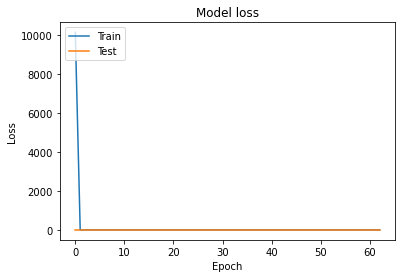

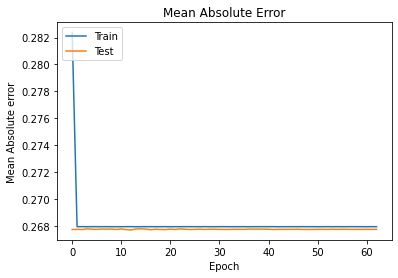

In [121]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mae values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('Mean Absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [100]:
model2 = Sequential()
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae'])

In [101]:
history = model2.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=80,
                 batch_size=32768,
                 callbacks=[lr_sched,early_stopping], 
                 verbose=1)

Epoch 1/80

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
109/109 [==============================] - 96s 867ms/step - loss: 0.8118 - mae: 0.1750 - val_loss: 0.6047 - val_mae: 0.1409
Epoch 2/80

Epoch 00002: LearningRateScheduler reducing learning rate to 0.09000000000000001.
109/109 [==============================] - 93s 853ms/step - loss: 0.5126 - mae: 0.0908 - val_loss: 0.5177 - val_mae: 0.0947
Epoch 3/80

Epoch 00003: LearningRateScheduler reducing learning rate to 0.08100000000000002.
109/109 [==============================] - 98s 900ms/step - loss: 0.5056 - mae: 0.0825 - val_loss: 0.5097 - val_mae: 0.0878
Epoch 4/80

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0729.
109/109 [==============================] - 99s 905ms/step - loss: 0.5001 - mae: 0.0758 - val_loss: 0.5117 - val_mae: 0.0954
Epoch 5/80

Epoch 00005: LearningRateScheduler reducing learning rate to 0.06561.
109/109 [==============================] - 99s 910ms/step - loss: 0.4959 - 

109/109 [==============================] - 80s 734ms/step - loss: 0.4708 - mae: 0.0204 - val_loss: 0.4694 - val_mae: 0.0163
Epoch 39/80

Epoch 00039: LearningRateScheduler reducing learning rate to 0.001824800363140075.
109/109 [==============================] - 80s 734ms/step - loss: 0.4708 - mae: 0.0204 - val_loss: 0.4691 - val_mae: 0.0153
Epoch 40/80

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0016423203268260676.
109/109 [==============================] - 85s 782ms/step - loss: 0.4708 - mae: 0.0202 - val_loss: 0.4686 - val_mae: 0.0141
Epoch 41/80

Epoch 00041: LearningRateScheduler reducing learning rate to 0.001478088294143461.
109/109 [==============================] - 88s 804ms/step - loss: 0.4708 - mae: 0.0202 - val_loss: 0.4693 - val_mae: 0.0172
Epoch 42/80

Epoch 00042: LearningRateScheduler reducing learning rate to 0.0013302794647291147.
109/109 [==============================] - 88s 808ms/step - loss: 0.4705 - mae: 0.0201 - val_loss: 0.4688 - val_mae: 0

109/109 [==============================] - 79s 729ms/step - loss: 0.4705 - mae: 0.0193 - val_loss: 0.4691 - val_mae: 0.0151
Epoch 76/80

Epoch 00076: LearningRateScheduler reducing learning rate to 3.6998848503512766e-05.
109/109 [==============================] - 82s 752ms/step - loss: 0.4704 - mae: 0.0192 - val_loss: 0.4691 - val_mae: 0.0153
Epoch 77/80

Epoch 00077: LearningRateScheduler reducing learning rate to 3.329896365316149e-05.
109/109 [==============================] - 84s 767ms/step - loss: 0.4702 - mae: 0.0193 - val_loss: 0.4691 - val_mae: 0.0154
Epoch 78/80

Epoch 00078: LearningRateScheduler reducing learning rate to 2.996906728784534e-05.
109/109 [==============================] - 89s 815ms/step - loss: 0.4701 - mae: 0.0192 - val_loss: 0.4691 - val_mae: 0.0151
Epoch 79/80

Epoch 00079: LearningRateScheduler reducing learning rate to 2.697216055906081e-05.
109/109 [==============================] - 95s 872ms/step - loss: 0.4703 - mae: 0.0192 - val_loss: 0.4691 - val_mae

In [102]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               15360     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

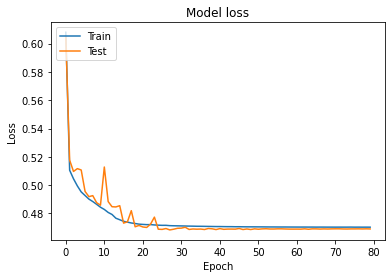

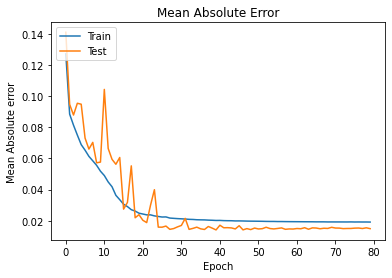

In [103]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mae values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('Mean Absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 跟著論文配置

In [104]:
model3 = Sequential()
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae'])

In [105]:
history = model3.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=80,
                 batch_size=32768,
                 callbacks=[lr_sched,early_stopping], 
                 verbose=1)

Epoch 1/80

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
109/109 [==============================] - 102s 927ms/step - loss: 0.6351 - mae: 0.1573 - val_loss: 0.6934 - val_mae: 0.1661
Epoch 2/80

Epoch 00002: LearningRateScheduler reducing learning rate to 0.09000000000000001.
109/109 [==============================] - 101s 927ms/step - loss: 0.5074 - mae: 0.0847 - val_loss: 0.5351 - val_mae: 0.1060
Epoch 3/80

Epoch 00003: LearningRateScheduler reducing learning rate to 0.08100000000000002.
109/109 [==============================] - 99s 908ms/step - loss: 0.5004 - mae: 0.0757 - val_loss: 0.5159 - val_mae: 0.0948
Epoch 4/80

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0729.
109/109 [==============================] - 101s 927ms/step - loss: 0.4959 - mae: 0.0698 - val_loss: 0.5487 - val_mae: 0.1463
Epoch 5/80

Epoch 00005: LearningRateScheduler reducing learning rate to 0.06561.
109/109 [==============================] - 100s 919ms/step - loss: 0.492

109/109 [==============================] - 89s 816ms/step - loss: 0.4678 - mae: 0.0146 - val_loss: 0.4704 - val_mae: 0.0199
Epoch 39/80

Epoch 00039: LearningRateScheduler reducing learning rate to 0.001824800363140075.
109/109 [==============================] - 90s 830ms/step - loss: 0.4676 - mae: 0.0145 - val_loss: 0.4707 - val_mae: 0.0206
Epoch 40/80

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0016423203268260676.
109/109 [==============================] - 93s 849ms/step - loss: 0.4677 - mae: 0.0145 - val_loss: 0.4700 - val_mae: 0.0186
Epoch 41/80

Epoch 00041: LearningRateScheduler reducing learning rate to 0.001478088294143461.
109/109 [==============================] - 87s 796ms/step - loss: 0.4676 - mae: 0.0144 - val_loss: 0.4706 - val_mae: 0.0209
Epoch 42/80

Epoch 00042: LearningRateScheduler reducing learning rate to 0.0013302794647291147.
109/109 [==============================] - 92s 845ms/step - loss: 0.4677 - mae: 0.0144 - val_loss: 0.4704 - val_mae: 0

109/109 [==============================] - 99s 905ms/step - loss: 0.4674 - mae: 0.0137 - val_loss: 0.4707 - val_mae: 0.0207
Epoch 76/80

Epoch 00076: LearningRateScheduler reducing learning rate to 3.6998848503512766e-05.
109/109 [==============================] - 99s 907ms/step - loss: 0.4672 - mae: 0.0137 - val_loss: 0.4708 - val_mae: 0.0209
Epoch 77/80

Epoch 00077: LearningRateScheduler reducing learning rate to 3.329896365316149e-05.
109/109 [==============================] - 99s 908ms/step - loss: 0.4675 - mae: 0.0137 - val_loss: 0.4707 - val_mae: 0.0208
Epoch 00077: early stopping


In [106]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               15360     
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

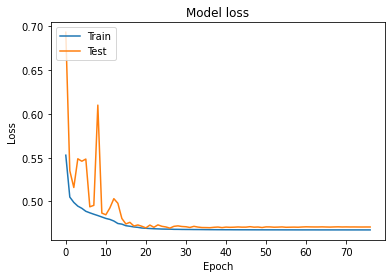

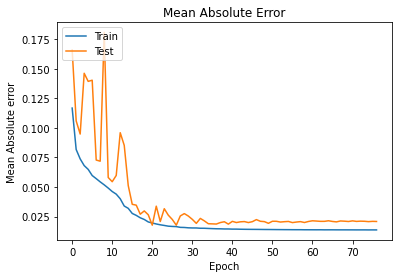

In [107]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mae values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('Mean Absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Ridge regression

In [108]:
from sklearn.linear_model import Ridge
reg = Ridge (alpha=0.1) #調整alpha值決定正則化的強度
reg.fit(X, y) 
# np.mean(cross_val_score(reg, X, y, cv=8))
print(reg.coef_) # 印出訓練後的模型參數，數值都明顯小於單純的線性回歸

[ 1.99818926e-08  2.28704132e-08  3.77102467e-10 -8.92846960e-09
  2.37649175e-09  5.69124168e-10 -1.17218853e-08 -6.72404720e-11
 -1.45871418e-07 -2.27540181e-07  2.96063666e-11 -2.19639794e-10
 -3.51757567e-09 -9.64732575e-09  7.05644740e-09  1.60570665e-10
  1.93845188e-08 -1.22002493e-03 -1.22002480e-03 -1.22002479e-03
  1.61045290e-08  2.14555654e-10  9.99998486e-01  9.10940148e-09
  1.11806269e-07 -2.58422771e-10  3.75316646e-09 -1.19357288e-11
  1.22002496e-03]


In [109]:
reg_scores = cross_val_score(reg, X, y, cv=7, scoring='neg_mean_absolute_error')

In [110]:
print("Ridge Regression scores",reg_scores)

Ridge Regression scores [-1.56650595e-07 -1.56807558e-07 -1.57001780e-07 -1.57165108e-07
 -1.56853420e-07 -1.56735802e-07 -1.56712755e-07]


In [111]:
mae = float(reg_scores.mean()*(-1))
print("Ridge Regression scores mean",'{:.10f}'.format(mae))

Ridge Regression scores mean 0.0000001568


### 藉由Ridge Regression找出對最終排名影響大的因素

In [112]:
importance = reg.coef_
column_name=data.columns
list_v=[]

# summarize feature importance
for i,v in enumerate(importance):
    list_v.append(v)

sort_v = sorted(enumerate(list_v),key = lambda x:x[1],reverse=True)
# print(sort_v)
for n in range(len(list_v)):
    print('Feature: ', column_name[sort_v[n][0]], ', Score: ',sort_v[n][1])


Feature:  walkDistance , Score:  0.9999984863764916
Feature:  damageDealtNorm , Score:  0.0012200249565972221
Feature:  winPoints , Score:  1.1180626933798209e-07
Feature:  boosts , Score:  2.2870413243929132e-08
Feature:  assists , Score:  1.998189256063078e-08
Feature:  revives , Score:  1.9384518752840878e-08
Feature:  teamKills , Score:  1.610452895880118e-08
Feature:  weaponsAcquired , Score:  9.109401476580859e-09
Feature:  numGroups , Score:  7.0564473983550694e-09
Feature:  playersJoined , Score:  3.753166463703307e-09
Feature:  headshotKills , Score:  2.376491745766106e-09
Feature:  heals , Score:  5.691241675097977e-10
Feature:  damageDealt , Score:  3.7710246740727853e-10
Feature:  vehicleDestroys , Score:  2.1455565351334886e-10
Feature:  rankPoints , Score:  1.6057066454849482e-10
Feature:  longestKill , Score:  2.960636661545909e-11
Feature:  killsNorm , Score:  -1.1935728775738091e-11
Feature:  killPoints , Score:  -6.724047201311784e-11
Feature:  matchDuration , Score: 

### 藉由Linear Regression找出對最終排名影響大的因素

In [113]:
print(lr.coef_)

[-1.79504152e-13  5.52400747e-15 -1.33897010e-16 -6.63384545e-15
 -1.24388802e-14 -6.32685950e-15 -4.44108558e-16  7.18302036e-20
 -3.29486940e-15  9.19471996e-15  3.05672347e-17  1.00807308e-18
  5.25886160e-18 -1.34400092e-18 -4.27364669e-17  2.07305953e-19
  2.12734203e-15 -5.65689222e-19 -1.15098172e-17 -1.01661295e-18
  7.10862985e-17  1.85662259e-19  1.00000000e+00 -1.17859803e-17
  2.09341685e-15 -2.22427441e-17 -6.04943242e-18  5.55157054e-19
  1.03047674e-18]


In [114]:
importance = lr.coef_
column_name=data.columns
list_v=[]

# summarize feature importance
for i,v in enumerate(importance):
    list_v.append(v)

sort_v = sorted(enumerate(list_v),key = lambda x:x[1],reverse=True)
# print(sort_v)
for n in range(len(list_v)):
    print('Feature: ', column_name[sort_v[n][0]], ', Score: ',sort_v[n][1])


Feature:  walkDistance , Score:  1.0000000000000044
Feature:  killStreaks , Score:  9.194719959145383e-15
Feature:  boosts , Score:  5.524007471858594e-15
Feature:  revives , Score:  2.1273420294996184e-15
Feature:  winPoints , Score:  2.093416846107801e-15
Feature:  teamKills , Score:  7.10862984889127e-17
Feature:  longestKill , Score:  3.0567234694465144e-17
Feature:  matchType , Score:  5.258861604992216e-18
Feature:  damageDealtNorm , Score:  1.0304767415128011e-18
Feature:  matchDuration , Score:  1.0080730783432544e-18
Feature:  killsNorm , Score:  5.5515705375826225e-19
Feature:  rankPoints , Score:  2.0730595268694767e-19
Feature:  vehicleDestroys , Score:  1.8566225850785342e-19
Feature:  killPoints , Score:  7.183020356001038e-20
Feature:  rideDistance , Score:  -5.656892216323622e-19
Feature:  swimDistance , Score:  -1.0166129548012307e-18
Feature:  maxPlace , Score:  -1.3440009245553233e-18
Feature:  playersJoined , Score:  -6.049432419028e-18
Feature:  roadKills , Score: 

### sklearn

In [124]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(512,256,128,64), activation='relu', solver='adam', learning_rate_init=0.1, max_iter=100000)
mlp.fit(X_train, y_train)

print('Sklearn score:',mlp.score(X_test, y_test))

Sklearn score: -0.001119336361542933


In [126]:
y_pred = mlp.predict(X_test)
mae = mean_absolute_error(y_pred, y_test)
print('mae_score',mae)

NameError: name 'mean_absolute_error' is not defined

In [ ]:
mae = float(reg_scores.mean()*(-1))
print("Ridge Regression scores mean",'{:.10f}'.format(mae))

In [ ]:
print("Ridge Regression scores mean 0.05018")